In [42]:
import sys
from matplotlib import pyplot as plt


In [55]:
class rocket_sensor_data_log:
    def __init__(self, time, t_t1, t_t2, c_t1, c_t2, c_t3, t_p1, t_p2, t_p, t_l, t1, c_p):
        self.time = time

        self.t_t1 = t_t1
        self.t_t2 = t_t2

        self.c_t1 = c_t1
        self.c_t2 = c_t2
        self.c_t3 = c_t3

        self.t_p1 = t_p1
        self.t_p2 = t_p2

        self.t_p = t_p

        self.t_l = t_l

        self.t1 = t1

        self.c_p = c_p

sensor_data_arr = []

In [44]:
class fill_station_sensor_data_log:
    def __init__(self, time, t_p, t_l, t1, t2, t3, p1, p2, p3, ematch, weight, tactile):
        self.time = time

        self.t_p = t_p
        self.t_l = t_l

        self.t1 = t1
        self.t2 = t2
        self.t3 = t3

        self.p1 = p1
        self.p2 = p2
        self.p3 = p3

        self.ematch = ematch

        self.weight = weight

        self.tactile = tactile

fill_sensor_data_arr = []

In [45]:
class msg_sent_log:
    def __init__(self, time, cmd, id, size, data):
        self.time = time
        self.cmd = cmd
        self.id = id
        self.size = size
        
        self.data = []
        for i in data: self.data.append(i)

msg_sent_arr = []

In [46]:
class state_change_log:
    def __init__(self, time, state):
        self.time = time
        self.state = state

state_change_arr = []

In [47]:
SENSOR_READING = 0
MSG_RECEIVED = 1
MSG_SENT = 2
SYSTEM_ERROR = 3
STATE_CHANGE = 4
EVENT_REACTION = 5

In [59]:
buff = []
with open("94.bin", 'rb') as f:
    buff.append(f.read())
buff = buff[0]

print(len(buff))
print(buff[0:100])

478567
b"\x00\x00=S\xff\x01{\x00\xeb'\xfd'\xfd\x01\x15\x14\xd6\x14\xd7\x14\xd6'\n\x80\x00\x18\xff\x9d\xff\xbb\x00\x02\x00\x00\x00\x00\xe75\x00`\x00\x00=Td\x01{\x00\xeb'\xfd'\xfd\x01\x15\x14\xd6\x14\xd7\x14\xd6'\n\x80\x00\x18\xff\x9d\xff\xbb\x00\x02\x00\x00\x00\x00\xe75\x00`\x00\x00=T\xc9\x01{\x00\xeb'\xfd'\xfd\x01\x15\x14\xd6\x14\xd7\x14"


In [49]:
#fill station
sensor_data_arr = []
msg_sent_arr = []
state_change_arr = []
fill_sensor_data_arr = []
v1 = 0
v2 = 0
v3 = 0

index = 0
while True:
    if index >= len(buff): break

    if(buff[index] == SENSOR_READING):
        time = int.from_bytes(buff[index + 1 : index + 5], byteorder='big', signed=True) 

        t_p = int.from_bytes(buff[index + 5 : index + 7], byteorder='big', signed=True)
        t_l = int.from_bytes(buff[index + 7 : index + 9], byteorder='big', signed=True)

        t1 = int.from_bytes(buff[index + 9 : index + 11], byteorder='big', signed=True) 
        t2 = int.from_bytes(buff[index + 11 : index + 13], byteorder='big', signed=True)
        t3 = int.from_bytes(buff[index + 13 : index + 15], byteorder='big', signed=True)

        p1 = int.from_bytes(buff[index + 15 : index + 17], byteorder='big', signed=True) 
        p2 = int.from_bytes(buff[index + 17 : index + 19], byteorder='big', signed=True)
        p3 = int.from_bytes(buff[index + 19 : index + 21], byteorder='big', signed=True)

        ematch = int.from_bytes(buff[index + 21 : index + 23], byteorder='big', signed=True)
        
        weight = int.from_bytes(buff[index + 23 : index + 25], byteorder='big', signed=True)

        tactile = int.from_bytes(buff[index + 25 : index + 26], byteorder='big', signed=True)

        fill_sensor_data_arr.append(fill_station_sensor_data_log(time, t_p, t_l, t1, t2, t3, p1, p2, p3, ematch, weight, tactile))
        index += 26
        v1 += 1

    elif(buff[index] == MSG_RECEIVED):
        time = int.from_bytes(buff[index + 1 : index + 5], byteorder='big', signed=True) 
        cmd = int.from_bytes(buff[index + 5 : index + 6], byteorder='big', signed=True) 
        id = int.from_bytes(buff[index + 6 : index + 7], byteorder='big', signed=True) 
        size = int.from_bytes(buff[index + 7 : index + 8], byteorder='big', signed=False) 
        
        data = []
        for i in range(size):
            data.append(int.from_bytes(buff[index + 8 + i : index + 9 + i], byteorder='big', signed=False))
        
        msg_sent_arr.append(msg_sent_log(time, cmd, id, size, data))

        index += 8 + size
        v2 += 1

    elif(buff[index] == STATE_CHANGE):
        time = int.from_bytes(buff[index + 1 : index + 5], byteorder='big', signed=True) 
        state = int.from_bytes(buff[index + 5 : index + 6], byteorder='big', signed=False) 

        state_change_arr.append(state_change_log(time, state))

        index += 6
        v3 += 1

    else:
        index += 1

print(v1, v2, v3)

986 118 7


In [50]:
for m in msg_sent_arr:
    print(m.time, m.cmd, m.size, m.data)

305686 0 0 []
306700 0 0 []
307702 0 0 []
308714 0 0 []
309733 0 0 []
310745 0 0 []
311769 0 0 []
312771 0 0 []
313779 0 0 []
314787 0 0 []
315797 0 0 []
316810 0 0 []
317695 8 0 []
317826 0 0 []
318825 0 0 []
319360 4 0 []
320844 0 0 []
321861 0 0 []
322864 0 0 []
323882 0 0 []
324900 0 0 []
325403 8 0 []
325918 0 0 []
326933 0 0 []
327939 0 0 []
328949 0 0 []
329959 0 0 []
330964 0 0 []
331982 0 0 []
332983 0 0 []
334001 0 0 []
335003 0 0 []
336019 0 0 []
337033 0 0 []
338051 0 0 []
339060 0 0 []
340069 0 0 []
341086 0 0 []
342098 0 0 []
343118 0 0 []
344134 0 0 []
345131 0 0 []
346149 0 0 []
347168 0 0 []
348182 0 0 []
349201 0 0 []
350217 0 0 []
351219 0 0 []
352234 0 0 []
353249 0 0 []
354268 0 0 []
355270 0 0 []
356283 0 0 []
357300 0 0 []
358319 0 0 []
359318 0 0 []
360334 0 0 []
361352 0 0 []
362365 0 0 []
363385 0 0 []
364403 0 0 []
365418 0 0 []
366435 0 0 []
367451 0 0 []
368471 0 0 []
369471 0 0 []
370490 0 0 []
371504 0 0 []
372504 0 0 []
373520 0 0 []
374536 0 0 []
375556

In [60]:
#rocket
sensor_data_arr = []
msg_sent_arr = []
state_change_arr = []

index = 0
while True:
    if index >= len(buff): break

    if(buff[index] == SENSOR_READING):
        time = int.from_bytes(buff[index + 1 : index + 5], byteorder='big', signed=True) 

        t_t1 = int.from_bytes(buff[index + 5 : index + 7], byteorder='big', signed=True) 
        t_t2 = int.from_bytes(buff[index + 7 : index + 9], byteorder='big', signed=True)

        c_t1 = int.from_bytes(buff[index + 9 : index + 11], byteorder='big', signed=True)
        c_t2 = int.from_bytes(buff[index + 11 : index + 13], byteorder='big', signed=True)
        c_t3 = int.from_bytes(buff[index + 13 : index + 15], byteorder='big', signed=True)

        t_p1 = int.from_bytes(buff[index + 15 : index + 17], byteorder='big', signed=True)
        t_p2 = int.from_bytes(buff[index + 17 : index + 19], byteorder='big', signed=True)

        t_p = int.from_bytes(buff[index + 19 : index + 21], byteorder='big', signed=True)
        t_l = int.from_bytes(buff[index + 21 : index + 23], byteorder='big', signed=True)

        tactile = int.from_bytes(buff[index + 23 : index + 24], byteorder='big', signed=True)

        cp = int.from_bytes(buff[index + 30 : index + 32], byteorder='big', signed=True)

        sensor_data_arr.append(rocket_sensor_data_log(time, t_t1, t_t2, c_t1, c_t2, c_t3, t_p1, t_p2, t_p, t_l, tactile, cp))
        index += 40

    elif(buff[index] == MSG_RECEIVED):
        time = int.from_bytes(buff[index + 1 : index + 5], byteorder='big', signed=True) 
        cmd = int.from_bytes(buff[index + 5 : index + 6], byteorder='big', signed=True) 
        id = int.from_bytes(buff[index + 6 : index + 7], byteorder='big', signed=True) 
        size = int.from_bytes(buff[index + 7 : index + 8], byteorder='big', signed=False) 
        
        data = []
        for i in range(size):
            data.append(int.from_bytes(buff[index + 8 + i : index + 9 + i], byteorder='big', signed=False))
        
        msg_sent_arr.append(msg_sent_log(time, cmd, id, size, data))

        index += 8 + size

    elif(buff[index] == STATE_CHANGE):
        time = int.from_bytes(buff[index + 1 : index + 5], byteorder='big', signed=True) 
        state = int.from_bytes(buff[index + 5 : index + 6], byteorder='big', signed=False) 

        state_change_arr.append(state_change_log(time, state))

        index += 6

    else:
        index += 1


305430
414371
17641903 0 0


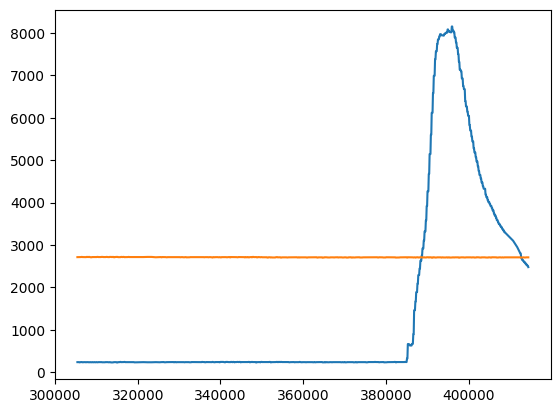

In [57]:
#make plots fill station temperature 

fig, ax = plt.subplots()

#plot tank temperatures
x = [log.time for log in fill_sensor_data_arr[:-1]]
ax.plot(x, [log.t1 for log in fill_sensor_data_arr[:-1]])
ax.plot(x, [log.t2 for log in fill_sensor_data_arr[:-1]])
#ax.plot(x, [log.t3 for log in fill_sensor_data_arr[:-1]])

ax.vlines([log.time for log in state_change_arr if log.state == 10], 0, 10000, colors='g')
print(x[0])
print(x[-1])
print(fill_sensor_data_arr[-1].time, fill_sensor_data_arr[-1].t1, fill_sensor_data_arr[-1].t2)
plt.show()

305430
414371
17641903 0 0


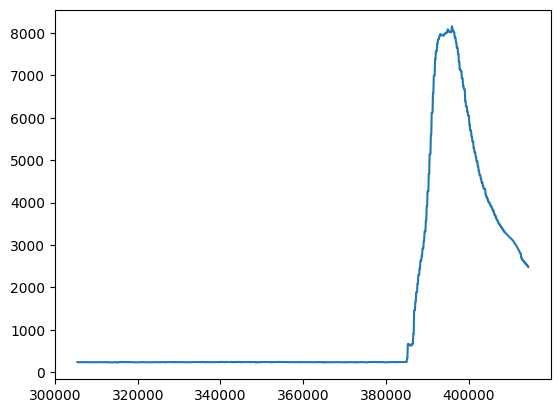

In [53]:

fig, ax = plt.subplots()

#plot tank temperatures
x = [log.time for log in fill_sensor_data_arr[:-1]]
#ax.plot(x, [log.ematch for log in fill_sensor_data_arr[:-1]])
#ax.plot(x, [log.p1 for log in fill_sensor_data_arr[:-1]])
#ax.plot(x, [log.p2 for log in fill_sensor_data_arr[:-1]])
#ax.plot(x, [log.p3 for log in fill_sensor_data_arr[:-1]])
ax.plot(x, [log.t1 for log in fill_sensor_data_arr[:-1]])

#ax.vlines([log.time for log in msg_sent_arr], 0, 1000, colors='g')
print(x[0])
print(x[-1])
print(fill_sensor_data_arr[-1].time, fill_sensor_data_arr[-1].t1, fill_sensor_data_arr[-1].t2)
ax.vlines([log.time for log in state_change_arr if log.state == 10], 0, 50, colors='y')
plt.show()

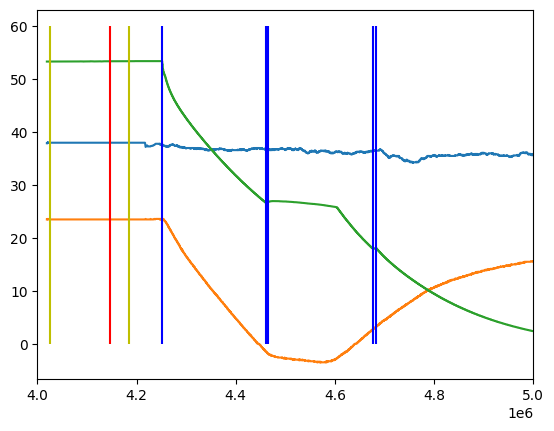

[4024662, 4185699]
53.3674465408805 53.39549685534591
379
235


In [106]:
#make plots rocket

fig, ax = plt.subplots()

#plot tank temperatures
x = [log.time for log in sensor_data_arr]
ax.plot(x, [log.t_t1 / 10  for log in sensor_data_arr])
ax.plot(x, [log.t_t2 / 10 for log in sensor_data_arr])
#ax.plot(x, [log.c_t1 for log in sensor_data_arr])
#ax.plot(x, [log.c_t2 for log in sensor_data_arr])
#ax.plot(x, [log.c_t3 for log in sensor_data_arr])
#ax.plot(x, [log.c_p / 100 for log in sensor_data_arr])
ax.plot(x, [log.t_p1 / 100 for log in sensor_data_arr])
#ax.plot(x, [log.t_p2 / 100 for log in sensor_data_arr])

ax.vlines([log.time for log in state_change_arr if log.state == 8], 0, 60, colors='r')
ax.set_xlim(0.4 * 1e7, 0.5 * 1e7)
ax.vlines([log.time for log in state_change_arr if log.state == 7], 0, 60, colors='y')
ax.vlines([log.time for log in msg_sent_arr if log.cmd == 7], 0, 60, colors='b')
plt.show()

print([log.time for log in state_change_arr if log.state == 7])

arr = [log.time for log in state_change_arr if log.state == 7]

avg_b = 0
avg_t = 0
count = 0

for log in sensor_data_arr:
    if log.time >= arr[0] and log.time <= arr[1]:
        avg_t += log.t_p1
        avg_b += log.t_p2
        count += 1

avg_t = avg_t / count
avg_b = avg_b / count

print(avg_t / 100, avg_b / 100)
print(sensor_data_arr[0].t_t1)
print(sensor_data_arr[0].t_t2)